## Pruning a Tree after Fitting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

In [4]:
X = iris.drop(['species'], axis = 1)
y = iris['species']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [6]:
dtree = DecisionTreeClassifier(random_state = 42).fit(X_train, y_train)
path = dtree.cost_complexity_pruning_path(X_train, y_train)

path

{'ccp_alphas': array([0.        , 0.00868056, 0.01190476, 0.01733193, 0.02018468,
        0.25904922, 0.34046294]),
 'impurities': array([0.        , 0.01736111, 0.02926587, 0.04659781, 0.06678248,
        0.3258317 , 0.66629464])}

In [7]:
ccp_alphas = path.ccp_alphas
impurities = path.impurities

In [10]:
nodes = []
for i in ccp_alphas[:-1]:
    dtree = DecisionTreeClassifier(random_state=42, ccp_alpha=i).fit(X_train, y_train)
    nodes.append(dtree.tree_.node_count)

nodes

[15, 11, 9, 7, 5, 3]

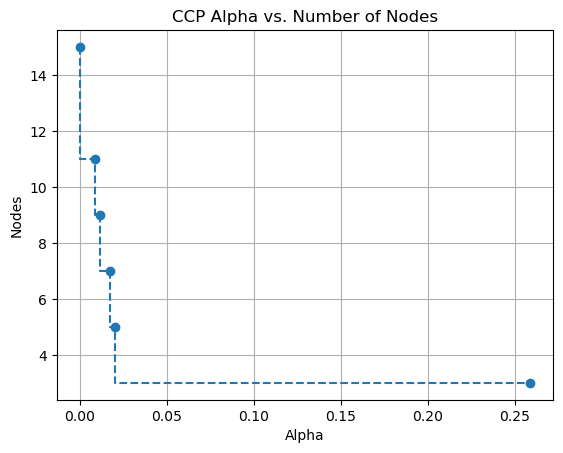

In [11]:
plt.step(ccp_alphas[:-1], nodes, '--o')
plt.xlabel('Alpha')
plt.ylabel('Nodes')
plt.title('CCP Alpha vs. Number of Nodes')
plt.grid();

In [12]:
depths = []
for i in ccp_alphas:
    dtree = DecisionTreeClassifier(random_state=42, ccp_alpha=i).fit(X_train, y_train)
    depths.append(dtree.get_depth())

depths

[5, 4, 3, 3, 2, 1, 0]

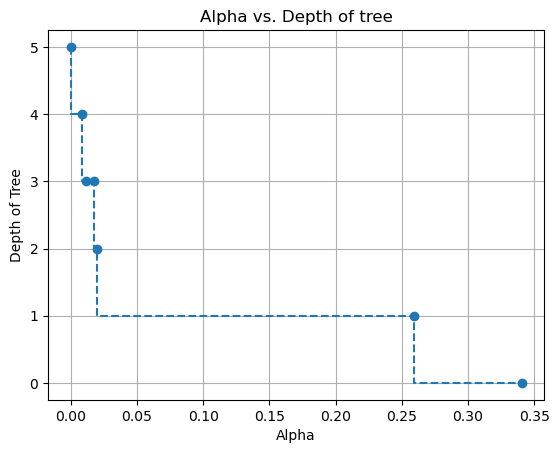

In [13]:
plt.step(ccp_alphas, depths, '--o')
plt.ylabel('Depth of Tree')
plt.xlabel('Alpha')
plt.grid()
plt.title('Alpha vs. Depth of tree');

In [15]:
train_accs = []
test_accs = []
for i in ccp_alphas[:-1]:
    dtree = DecisionTreeClassifier(random_state=42, ccp_alpha=i).fit(X_train, y_train)
    train_accs.append(dtree.score(X_train, y_train))
    test_accs.append(dtree.score(X_test, y_test))

train_accs

[1.0,
 0.9910714285714286,
 0.9821428571428571,
 0.9732142857142857,
 0.9642857142857143,
 0.6785714285714286]

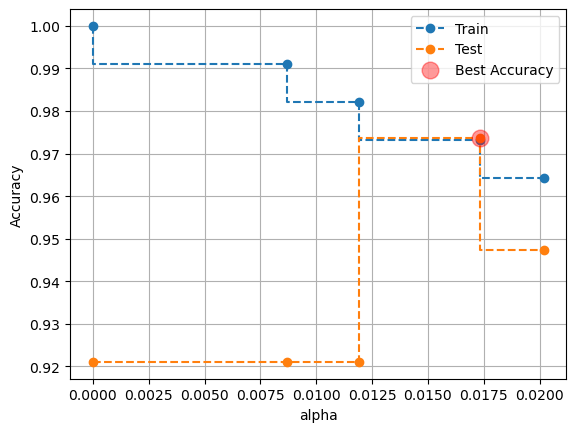

In [16]:
plt.step(ccp_alphas[:-2], train_accs[:-1], '--o', label = 'Train')
plt.step(ccp_alphas[:-2], test_accs[:-1], '--o', label = 'Test')
plt.plot(ccp_alphas[np.argmax(test_accs)], max(test_accs), 'ro', markersize = 12, alpha = 0.4, label = 'Best Accuracy')
plt.legend()
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Accuracy');

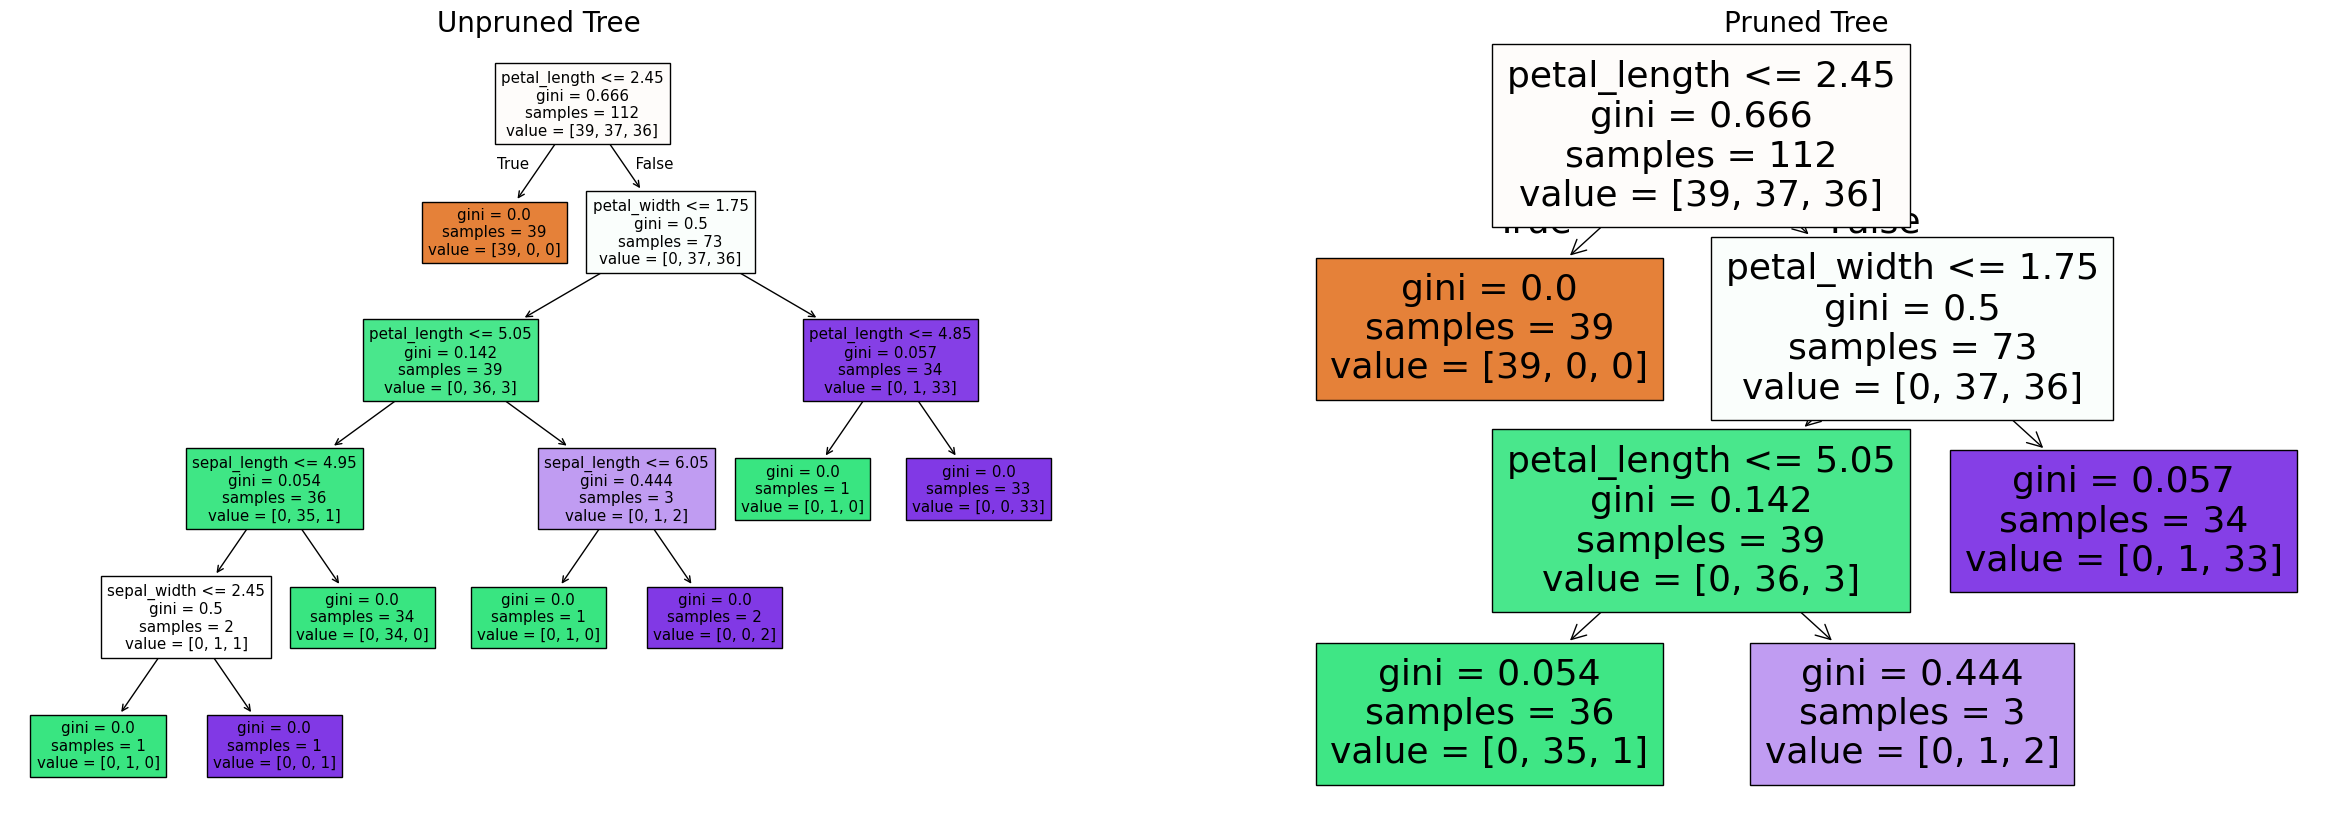

In [17]:
fig, ax = plt.subplots(1,2, figsize = (30, 10))
plot_tree(DecisionTreeClassifier(random_state=42).fit(X_train, y_train), ax = ax[0], filled = True, feature_names=X.columns);
ax[0].set_title('Unpruned Tree', fontsize = 20)
plot_tree(DecisionTreeClassifier(random_state = 42, ccp_alpha=ccp_alphas[np.argmax(test_accs)]).fit(X_train, y_train), filled = True, feature_names = X.columns);
ax[1].set_title('Pruned Tree', fontsize = 20);